In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from subprocess import check_output
from sklearn.tree import export_graphviz 
import pydot
import matplotlib.pyplot as plt


In [127]:
data = pd.read_csv('https://aaa-pgdmlai.s3.amazonaws.com/household_level.csv')
data.columns

Index(['household_key', 'zip5', 'fsv_cmsi_flag', 'fsv_credit_card_flag',
       'fsv_deposit_program_flag', 'fsv_home_equity_flag', 'fsv_id_theft_flag',
       'fsv_mortgage_flag', 'ins_client_flag', 'trv_globalware_flag',
       'length_of_residence', 'income', 'children', 'ers_ent_count_year_1',
       'ers_ent_count_year_2', 'ers_ent_count_year_3',
       'ers_member_cost_year_1', 'ers_member_cost_year_2',
       'ers_member_cost_year_3', 'mosaic_household', 'mosaic_global_household',
       'kcl_b_ind_mosaicsgrouping', 'new_mover_flag', 'breakdown_city',
       'basic_cost', 'clearing_code_last_description', 'motorcycle_indicator',
       'plus_cost', 'premier_cost', 'prob1_code_description',
       'sc_vehicle_manufacturer_name', 'sc_vehicle_model_name', 'total_cost'],
      dtype='object')

In [128]:
data.shape

(11351, 33)

In [129]:
data.describe()

,household_key,zip5,length_of_residence,ers_ent_count_year_1,ers_ent_count_year_2,ers_ent_count_year_3,ers_member_cost_year_1,ers_member_cost_year_2,ers_member_cost_year_3,basic_cost,plus_cost,premier_cost,total_cost
count,1.135100e+04,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000,11351.000000
mean,1.514281e+07,2948.529821,7.265527,0.369042,0.659325,0.676064,20.100107,36.342013,34.885842,52.367813,4.239274,0.008457,58.072806
std,1.985961e+07,493.109440,7.142623,0.844004,1.102884,1.134943,50.514678,70.971258,63.855087,81.475561,23.167685,0.767006,138.109209
min,8.750000e+02,2801.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.312093e+06,2857.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.772276e+06,2888.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,32.500000
75%,1.621354e+07,2910.000000,15.000000,0.000000,1.000000,1.000000,0.000000,58.850000,53.000000,58.850000,0.000000,0.000000,60.000000
max,1.000791e+08,6902.000000,49.000000,7.000000,10.000000,9.000000,560.740000,904.390000,604.000000,1545.850000,576.000000,81.000000,11420.850000


In [0]:
new_data = data.copy()
cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())
for col in cols_with_missing:
    new_data[col + '_was_missing'] = new_data[col].isnull()
data_encoded = pd.get_dummies(new_data)
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(data_encoded))
new_data.columns = data_encoded.columns

In [131]:
new_data.iloc[:,5:].head(5)

,ers_ent_count_year_3,ers_member_cost_year_1,ers_member_cost_year_2,ers_member_cost_year_3,basic_cost,plus_cost,premier_cost,total_cost,fsv_cmsi_flag_N,fsv_cmsi_flag_Y,fsv_credit_card_flag_N,fsv_credit_card_flag_Y,fsv_deposit_program_flag_N,fsv_deposit_program_flag_Y,fsv_home_equity_flag_N,fsv_home_equity_flag_Y,fsv_id_theft_flag_N,fsv_id_theft_flag_Y,fsv_mortgage_flag_N,fsv_mortgage_flag_Y,ins_client_flag_N,ins_client_flag_Y,trv_globalware_flag_N,trv_globalware_flag_Y,income_0,"income_10-19,999","income_100-149,999","income_150 - 174,999","income_175 - 199,999","income_20-29,999","income_200 - 249,999",income_250K+,"income_30-39,999","income_40-49,999","income_50-59,999","income_60-69,999","income_70-79,999","income_80-89,999","income_90-99,999",income_Under 10K,...,sc_vehicle_model_name_VOYAGER,sc_vehicle_model_name_VUE,sc_vehicle_model_name_W3500 TILTMASTER,sc_vehicle_model_name_WAGON,sc_vehicle_model_name_WINDSTAR,sc_vehicle_model_name_WRANGLER,sc_vehicle_model_name_WRX,sc_vehicle_model_name_X-90,sc_vehicle_model_name_X-TYPE,sc_vehicle_model_name_X3,sc_vehicle_model_name_X5,sc_vehicle_model_name_XA,sc_vehicle_model_name_XB,sc_vehicle_model_name_XC60,sc_vehicle_model_name_XC70,sc_vehicle_model_name_XC90,sc_vehicle_model_name_XD,sc_vehicle_model_name_XF,sc_vehicle_model_name_XG300,sc_vehicle_model_name_XG350,sc_vehicle_model_name_XJ,sc_vehicle_model_name_XJ12,sc_vehicle_model_name_XJ8,sc_vehicle_model_name_XJS,sc_vehicle_model_name_XK,sc_vehicle_model_name_XK8,sc_vehicle_model_name_XL-7,sc_vehicle_model_name_XTERRA,sc_vehicle_model_name_XTS,sc_vehicle_model_name_XV,sc_vehicle_model_name_XV CROSSTREK,sc_vehicle_model_name_YARIS,sc_vehicle_model_name_YUKON,sc_vehicle_model_name_YUKON XL,sc_vehicle_model_name_YUKON XL 1500,sc_vehicle_model_name_YUKON XL 2500,sc_vehicle_model_name_Yukon XL 1500,sc_vehicle_model_name_Z3,sc_vehicle_model_name_Z4,sc_vehicle_model_name_ZEPHYR
0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,58.85,0.00,106.50,31.0,75.0,0.0,106.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,58.85,0.00,106.50,116.0,156.0,0.0,272.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,58.85,58.85,106.50,462.2,51.0,0.0,513.2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,76.57,29.0,72.0,0.0,101.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
labels = np.array(new_data['total_cost'])

In [0]:
new_data= new_data.drop('total_cost', axis = 1)

In [0]:
feature_list = list(new_data.columns)

In [0]:
features = np.array(new_data)

In [0]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [137]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8513, 1310)
Training Labels Shape: (8513,)
Testing Features Shape: (2838, 1310)
Testing Labels Shape: (2838,)


In [0]:
baseline_preds = test_features[:, feature_list.index('ers_member_cost_year_1')]

In [0]:
baseline_errors = abs(baseline_preds - test_labels)

In [140]:
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  51.07


In [0]:
rf = RandomForestRegressor(n_estimators = 64, random_state = 42)

In [0]:
rf.fit(train_features, train_labels);

In [0]:
predictions = rf.predict(test_features)

In [0]:
errors = abs(predictions - test_labels)

In [145]:
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 1.89


In [146]:
mape = 100 * (errors/test_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [147]:
print(np.nan_to_num(mape))

[0.         0.61671576 0.         ... 0.16589506 0.         0.        ]


In [148]:
accuracy = 100 - np.mean(np.nan_to_num(mape))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.03 %.


In [0]:
tree = rf.estimators_[5]

In [0]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [0]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [0]:
graph.write_png('tree.png')

In [153]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
tree_small = rf_small.estimators_[5]

In [0]:
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [0]:
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

In [0]:
graph.write_png('small_tree.png');

In [0]:
importances = list(rf.feature_importances_)

In [0]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [0]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [0]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [181]:
rf_most_important = RandomForestRegressor(n_estimators=124, random_state=42)
important_indices = [feature_list.index('basic_cost'), feature_list.index('clearing_code_last_description_Restricted Roadway'), feature_list.index('plus_cost')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / test_labels))
print(np.nan_to_num(mape))
accuracy = 100 - np.nan_to_num(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.64
0.0
Accuracy: 100.0 %.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [0]:
%matplotlib inline

In [0]:
plt.style.use('fivethirtyeight')

In [0]:
x_values = list(range(len(importances)))

<BarContainer object of 1310 artists>

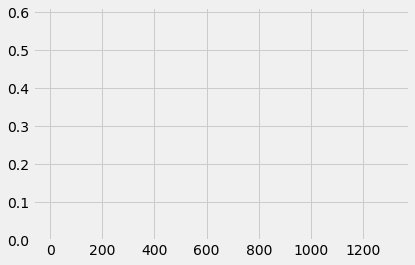

In [185]:
plt.bar(x_values, importances, orientation = 'vertical')

In [0]:
plt.xticks(x_values, feature_list, rotation='vertical')

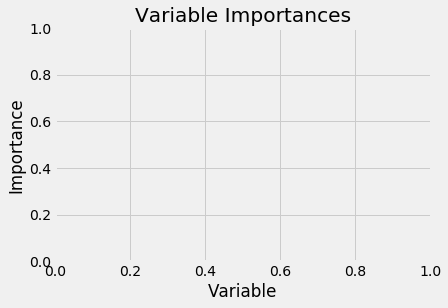

In [187]:
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');